# **Tarea 4 - Sistemas Difusos**

* _Maria Alejandra Bonilla Diaz - 20251595002_ 
* _Alvaro Alejandro Zarabanda Gutierrez – 20251595006_


La presión interna dentro de una caldera puede ser estimada en función de su temperatura interna y del volumen de agua en el interior. El especialista encargado del proceso obtuvo datos para determinar el comportamiento del sistema apartir de sus entradas y la salida:
- Variables de entrada:
    - Temperatura: varia de 800°C a 1200°C.
    - Volumen: varia de 2m³ a 12m³ de agua.
- Variable de salida:
    - Presión: varia de 4 atm a 12 atm

Funciones de pertenencia:

![Enunciado](./assets/Tarea4/Enunciado.PNG)

Reglas:
1. Si (Temperatura es baja) y (Volumen es pequeño) Entonces (Presión es baja)
2. Si (Temperatura es media) y (Volumen es pequeño) Entonces (Presión es baja)
3. Si (Temperatura es alta) y (Volumen es pequeño) Entonces (Presión es media)
4. Si (Temperatura es baja) y (Volumen es medio) Entonces (Presión es baja)
5. Si (Temperatura es media) y (Volumen es medio) Entonces (Presión es media)
6. Si (Temperatura es alta) y (Volumen es medio) Entonces (Presión es alta)
7. Si (Temperatura es baja) y (Volumen es grande) Entonces (Presión es media)
8. Si (Temperatura es media) y (Volumen es grande) Entonces (Presión es alta)
9. Si (Temperatura es alta) y (Volumen es grande) Entonces (Presión es alta)


## Punto 1:
Obtener los valores de salida(deffuzificados) en función de las regiones fuzzy resultantes a partir de las contribuciones de todas las reglas activadas.

#### Desarrollo:

Se implementan los procedimientos computacionales necesarios para construir un sistema de inferencia difuso tipo Mamdani.  
Este proceso sigue la estructura clásica:
1. Fuzzificación: Los valores nítidos de entrada (temperatura y volumen) se convierten en grados de pertenencia a los conjuntos difusos definidos para cada variable.  

2. Activación de reglas: Cada regla se activa mediante el operador mínimo, que corresponde al conectivo lógico Y, evaluando el grado en que se cumplen sus premisas.  

3. Implicación Mamdani: La función de salida asociada a cada regla se recorta aplicando el operador:  

$$
\mu_{\mathrm{salida}}(p) = \min\big( \mu_{\mathrm{base}}(p), \alpha_r \big)
$$  

donde $\alpha_r$ es la fuerza de activación de la regla.  

4. Agregación: Todas las contribuciones individuales de las reglas activas se integran mediante el operador máximo, generando una única región difusa de salida.  

5. Defuzzificación: La región agregada se transforma en un valor nítido mediante un método de defuzzificación:  
    - Centro de Área (CoA)  
    - Media de los Máximos (MoM)  
    - Primer Máximo (FOM)  
    
6. Implementación computacional: En esta etapa se programan todas las funciones necesarias —fuzzificación, activación de reglas, implicación, agregación y defuzzificación— que constituyen el núcleo matemático del sistema difuso Mamdani.  

Estas funciones permiten procesar cualquier par de entradas \((T, V)\) y obtener tanto la región difusa de salida como su valor crisp equivalente.  



In [ ]:
%%capture
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
import funciones

# --- Definición de Universos y Conjuntos Difusos ---
universo_temp = np.linspace(800, 1200, 500)
universo_vol = np.linspace(2, 12, 500)
universo_pres = np.linspace(4, 12, 500)



# Conjuntos difusos para Temperatura (T)
conjuntos_T = {
    'TB': {'nombre': 'Baja', 'tipo': 'trapezoidal', 'parametros': [800, 800, 900, 1000]},
    'TM': {'nombre': 'Media', 'tipo': 'triangular',  'parametros': [900, 1000, 1100]},
    'TA': {'nombre': 'Alta', 'tipo': 'trapezoidal',  'parametros': [1000, 1100, 1200, 1200]}
}


# Conjuntos difusos para Volumén (V)
conjuntos_V = {
    'VP': {'nombre': 'Pequeño', 'tipo': 'trapezoidal', 'parametros': [2, 2, 4.5, 7]},
    'VM': {'nombre': 'Medio',    'tipo': 'triangular',  'parametros': [4.5, 7, 9.5]},
    'VG': {'nombre': 'Grande',   'tipo': 'triangular',  'parametros': [7, 9.5, 12]}
}

# Conjuntos difusos para Presión (P)
conjuntos_P = {
    'PB': {'nombre': 'Baja',  'tipo': 'trapezoidal', 'parametros': [4, 4, 5, 8]},
    'PM': {'nombre': 'Media', 'tipo': 'triangular',  'parametros': [6, 8, 10]},
    'PA': {'nombre': 'Alta',  'tipo': 'trapezoidal', 'parametros': [8, 11, 12, 12]}
}

#Reglas
reglas = {
    'R1': ("TB",  "VP", "PB"),
    'R2':("TM", "VP", "PB"),
    'R3':("TA",  "VP", "PM"),
    'R4':("TB",  "VM",   "PB"),
    'R5':("TM", "VM",   "PM"),
    'R6':("TA",  "VM",   "PA"),
    'R7':("TB",  "VG",  "PM"),
    'R8':("TM", "VG",  "PA"),
    'R9':("TA",  "VG",  "PA")
}

#Se calcula los μ en cada conjunto.
def fuzzificar_variable(x_crisp, conjuntos):
    grados = {}
    for clave, info in conjuntos.items():
        mu_x = funciones.membresia_difusa(
            np.array([x_crisp]),
            info['tipo'],
            info['parametros']
        )[0]
        grados[clave] = mu_x
    return grados

#Activación de reglas con min y max Mamdani
def activar_reglas(mu_T, mu_V, reglas):
    activaciones = {}

    for nombre_regla, (etq_T, etq_V, etq_P) in reglas.items():
        alpha = min(mu_T[etq_T], mu_V[etq_V])  # operador Y = min
        activaciones[nombre_regla] = {
            'etq_T': etq_T,
            'etq_V': etq_V,
            'etq_P': etq_P,
            'alpha': alpha
        }

    return activaciones

#Regiones fuzzy resultantes
# Se toma la función de pertenencia de su salida (PB/PM/PA) en universo_pres.
# Se recorta al nivel αᵢ → min(μ_P_salida(x), αᵢ), para la implicación de Mamdani.
# Se agregan todas con máximo → μ_agg(x).

def construir_salida_fuzzy(activaciones, conjuntos_P, universo_pres):
    mu_agg = np.zeros_like(universo_pres)
    contribuciones = {}

    for nombre_regla, info in activaciones.items():
        alpha = info['alpha']
        etq_P = info['etq_P']

        if alpha <= 0:
            continue

        datos_conj = conjuntos_P[etq_P]
        mu_base = funciones.membresia_difusa(
            universo_pres,
            datos_conj['tipo'],
            datos_conj['parametros']
        )

        # Implicación Mamdani: recorte por min
        mu_recortada = np.minimum(mu_base, alpha)

        # Contribución de esta regla
        contribuciones[nombre_regla] = mu_recortada

        # Agregación: máximo punto a punto
        mu_agg = np.maximum(mu_agg, mu_recortada)

    return mu_agg, contribuciones

#Defuzzificación (Centroide, Media de Máximos, Primer Máximo)
# Valores de salida (defuzzificados) en función de las regiones fuzzy resultantes…

def defuzzificar(universo, mu):
    # Centroide
    num = np.sum(universo * mu)
    den = np.sum(mu)
    centroide = num / den if den != 0 else np.nan

    # Máximo de μ(x)
    mu_max = np.max(mu)
    if mu_max == 0:
        mom = np.nan
        fpm = np.nan
    else:
        indices_max = np.where(mu == mu_max)[0]
        x_max = universo[indices_max]
        mom = np.mean(x_max)     # Media de máximos
        fpm = x_max[0]           # Primer máximo

    return centroide, mom, fpm


In [2]:
#Prueba de fuzzificación y activación de reglas
T0 = 965   # °C
V0 = 11.0  # m3

mu_T = fuzzificar_variable(T0, conjuntos_T)
mu_V = fuzzificar_variable(V0, conjuntos_V)

print("Fuzzificación T:", mu_T)
print("Fuzzificación V:", mu_V)


Fuzzificación T: {'TB': np.float64(0.35), 'TM': np.float64(0.65), 'TA': np.float64(0.0)}
Fuzzificación V: {'VP': np.float64(0.0), 'VM': np.float64(0.0), 'VG': np.float64(0.4)}


In [3]:
activaciones = activar_reglas(mu_T, mu_V, reglas)

for r, info in activaciones.items():
    print(f"{r}: T={info['etq_T']}, V={info['etq_V']}, P={info['etq_P']}, alpha={info['alpha']:.4f}")


R1: T=TB, V=VP, P=PB, alpha=0.0000
R2: T=TM, V=VP, P=PB, alpha=0.0000
R3: T=TA, V=VP, P=PM, alpha=0.0000
R4: T=TB, V=VM, P=PB, alpha=0.0000
R5: T=TM, V=VM, P=PM, alpha=0.0000
R6: T=TA, V=VM, P=PA, alpha=0.0000
R7: T=TB, V=VG, P=PM, alpha=0.3500
R8: T=TM, V=VG, P=PA, alpha=0.4000
R9: T=TA, V=VG, P=PA, alpha=0.0000


In [4]:
def sistema_mamdani(T_val, V_val, mostrar_detalle=True, graficar=True):
    # 1) Fuzzificación
    mu_T = fuzzificar_variable(T_val, conjuntos_T)
    mu_V = fuzzificar_variable(V_val, conjuntos_V)

    # 2) Activación de reglas
    activaciones = activar_reglas(mu_T, mu_V, reglas)

    # 3) Construcción de región fuzzy de salida
    mu_agg, contribuciones = construir_salida_fuzzy(activaciones, conjuntos_P, universo_pres)

    # 4) Defuzzificación
    cda, mom, fpm = defuzzificar(universo_pres, mu_agg)

    if mostrar_detalle:
        print("="*80)
        print(f"SISTEMA MAMDANI PARA T = {T_val} °C, V = {V_val} m3\n")

        print("Fuzzificación de T:")
        for k, v in mu_T.items():
            print(f"  {k:2s} ({conjuntos_T[k]['nombre']:5s}): {v:.4f}")

        print("\nFuzzificación de V:")
        for k, v in mu_V.items():
            print(f"  {k:2s} ({conjuntos_V[k]['nombre']:8s}): {v:.4f}")

        print("\nReglas activadas (alpha > 0):")
        hay_activas = False
        for nombre_regla, info in activaciones.items():
            if info['alpha'] > 0:
                hay_activas = True
                print(f"  {nombre_regla}: IF T es {info['etq_T']} AND V es {info['etq_V']} "
                      f"THEN P es {info['etq_P']} | alpha = {info['alpha']:.4f}")
        if not hay_activas:
            print("  (ninguna regla activa)")

        print("\nValores defuzzificados de P (atm):")
        print(f"  Centroide (CDA)       : {cda:.4f}")
        print(f"  Media de máximos (MoM): {mom:.4f}")
        print(f"  Primer máximo (FPM)   : {fpm:.4f}")

    # 5) Gráfico de la región fuzzy resultante (opcional)
    if graficar:
        plt.figure(figsize=(8,4))
        plt.plot(universo_pres, mu_agg, label='Salida agregada μ_P(x)', linewidth=2)
        plt.xlabel("Presión (atm)")
        plt.ylabel("Grado de pertenencia")
        plt.title(f"Región fuzzy de salida para T={T_val}, V={V_val}")
        plt.grid(True)
        plt.ylim(-0.1, 1.1)

        # marcar los valores defuzzificados
        plt.axvline(cda, color='C1', linestyle='--', label=f'CDA = {cda:.2f}')
        plt.axvline(mom, color='C2', linestyle='--', label=f'MoM = {mom:.2f}')
        plt.axvline(fpm, color='C3', linestyle='--', label=f'FPM = {fpm:.2f}')

        plt.legend()
        plt.show()

    return cda, mom, fpm, mu_agg


SISTEMA MAMDANI PARA T = 965 °C, V = 11.0 m3

Fuzzificación de T:
  TB (Baja ): 0.3500
  TM (Media): 0.6500
  TA (Alta ): 0.0000

Fuzzificación de V:
  VP (Pequeño ): 0.0000
  VM (Medio   ): 0.0000
  VG (Grande  ): 0.4000

Reglas activadas (alpha > 0):
  R7: IF T es TB AND V es VG THEN P es PM | alpha = 0.3500
  R8: IF T es TM AND V es VG THEN P es PA | alpha = 0.4000

Valores defuzzificados de P (atm):
  Centroide (CDA)       : 9.2698
  Media de máximos (MoM): 10.6052
  Primer máximo (FPM)   : 9.2104


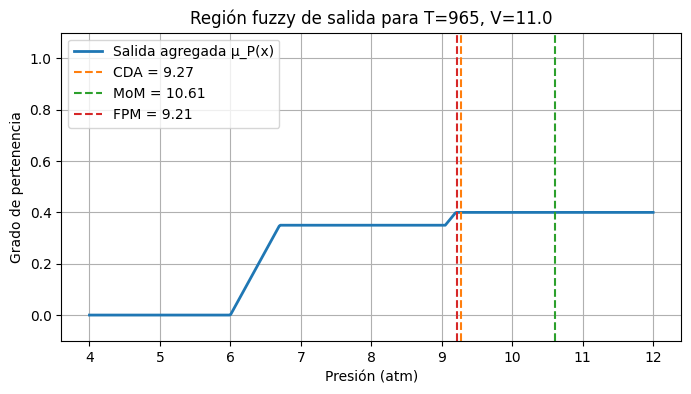

In [5]:
cda, mom, fpm, mu_agg = sistema_mamdani(965, 11.0)


## Punto 2:
Considere los siguientes valores de temperatura y volumen:

   a) Temperatura = 965 °C y Volumen = 11 m³  
   b) Temperatura = 920 °C y Volumen = 7.6 m³  
   c) Temperatura = 1050 °C y Volumen = 6.3 m³  
   d) Temperatura = 843 °C y Volumen = 8.6 m³  
   e) Temperatura = 1122 °C y Volumen = 5.2 m³  

   Para los valores anteriores determine cuáles conjuntos fuzzy están activos en función de las entradas indicando las reglas fuzzy asociadas con el cálculo de la región de salida.


#### Desarollo:

Para cada uno de los valores proporcionados (casos a–e), se identifican los conjuntos difusos activos para las variables de entrada temperatura (T) y volumen (V).  
Un conjunto se considera activo cuando su grado de pertenencia cumple **μ > 0**.

Luego, con base en los conjuntos activos, se evalúa la fuerza de activación de cada regla utilizando el operador:

$$
\alpha = \min(\mu_T, \mu_V)
$$

Cada regla cuya activación sea mayor que cero se considera **regla activa**, lo que significa que contribuye a la construcción de la región difusa final de salida.

En esta etapa el sistema no produce valores nítidos, sino que determina: qué conjuntos participan, qué reglas se encienden, y cuál es su contribución potencial.

Esto describe el comportamiento lógico del sistema para cada par \((T, V)\), y constituye la base para los cálculos de los puntos siguientes.



In [15]:
def analizar_caso_punto2_resumido(T_val, V_val):
    mu_T = fuzzificar_variable(T_val, conjuntos_T)
    mu_V = fuzzificar_variable(V_val, conjuntos_V)
    activaciones = activar_reglas(mu_T, mu_V, reglas)

    activos_T = [f"{k}({conjuntos_T[k]['nombre']})"
                 for k, mu in mu_T.items() if mu > 0]
    activos_V = [f"{k}({conjuntos_V[k]['nombre']})"
                 for k, mu in mu_V.items() if mu > 0]

    reglas_activas = []
    for nombre_regla, info in activaciones.items():
        if info['alpha'] > 0:
            reglas_activas.append(
                f"{nombre_regla}: T={info['etq_T']}, V={info['etq_V']}, P={info['etq_P']}"
            )

    print("="*80)
    print(f"T = {T_val}°C, V = {V_val} m³")
    print("  Conjuntos T activos:", ", ".join(activos_T) if activos_T else "(ninguno)")
    print("  Conjuntos V activos:", ", ".join(activos_V) if activos_V else "(ninguno)")
    print("  Reglas activas:")
    if reglas_activas:
        for r in reglas_activas:
            print("   ", r)
    else:
        print("    (ninguna)")

def graficar_salida_caso(T_val, V_val):
    # reutilizamos todo lo del punto 1
    mu_T = fuzzificar_variable(T_val, conjuntos_T)
    mu_V = fuzzificar_variable(V_val, conjuntos_V)
    activaciones = activar_reglas(mu_T, mu_V, reglas)
    mu_agg, contribuciones = construir_salida_fuzzy(activaciones, conjuntos_P, universo_pres)

    plt.figure(figsize=(8,4))
    plt.plot(universo_pres, mu_agg, label='μ_agg(P)', linewidth=2)
    plt.title(f"Región fuzzy de salida para T={T_val}°C, V={V_val} m³")
    plt.xlabel("Presión (atm)")
    plt.ylabel("μ")
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()


CASO: T = 965°C, V = 11.0 m³

Conjuntos activos para Temperatura (T):
  TB (Baja ): μ = 0.3500
  TM (Media): μ = 0.6500

Conjuntos activos para Volumen (V):
  VG (Grande  ): μ = 0.4000

Reglas activadas (α > 0):
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.3500
  R8: IF T es TM AND V es VG THEN P es PA | α = 0.4000


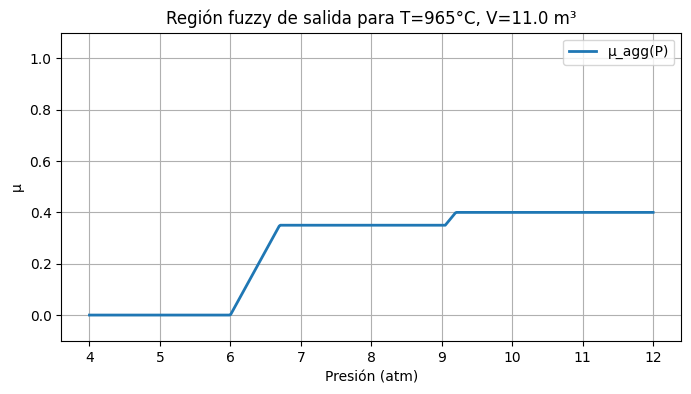

In [16]:
#Caso A
analizar_caso_punto2(965, 11.0) 
graficar_salida_caso(965, 11.0)

CASO: T = 920°C, V = 7.6 m³

Conjuntos activos para Temperatura (T):
  TB (Baja ): μ = 0.8000
  TM (Media): μ = 0.2000

Conjuntos activos para Volumen (V):
  VM (Medio   ): μ = 0.7600
  VG (Grande  ): μ = 0.2400

Reglas activadas (α > 0):
  R4: IF T es TB AND V es VM THEN P es PB | α = 0.7600
  R5: IF T es TM AND V es VM THEN P es PM | α = 0.2000
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.2400
  R8: IF T es TM AND V es VG THEN P es PA | α = 0.2000


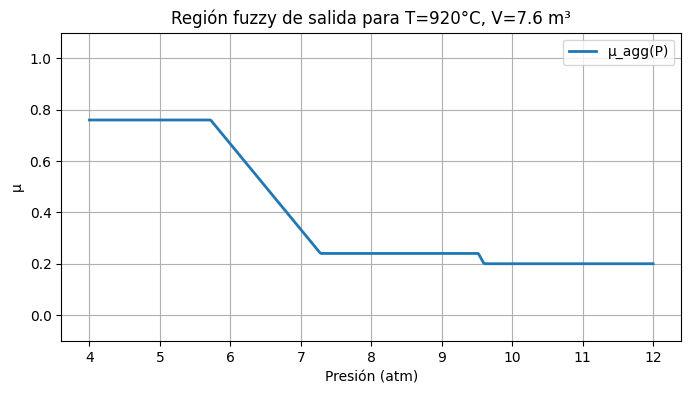

In [ ]:
#Caso B
analizar_caso_punto2(920, 7.6)
graficar_salida_caso(920, 7.6)

CASO: T = 1050°C, V = 6.3 m³

Conjuntos activos para Temperatura (T):
  TM (Media): μ = 0.5000
  TA (Alta ): μ = 0.5000

Conjuntos activos para Volumen (V):
  VP (Pequeño ): μ = 0.2800
  VM (Medio   ): μ = 0.7200

Reglas activadas (α > 0):
  R2: IF T es TM AND V es VP THEN P es PB | α = 0.2800
  R3: IF T es TA AND V es VP THEN P es PM | α = 0.2800
  R5: IF T es TM AND V es VM THEN P es PM | α = 0.5000
  R6: IF T es TA AND V es VM THEN P es PA | α = 0.5000


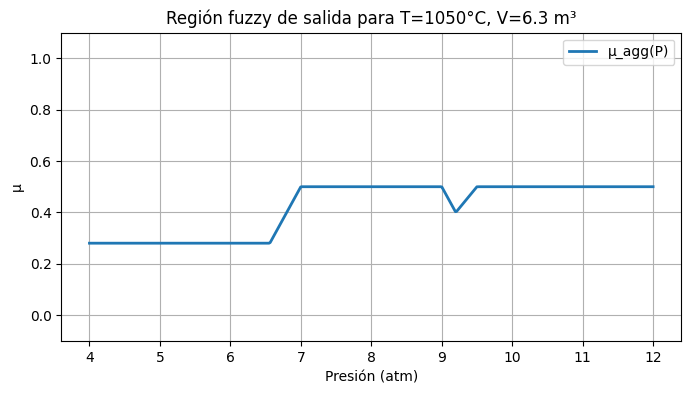

In [18]:
#Caso C
analizar_caso_punto2(1050, 6.3)
graficar_salida_caso(1050, 6.3)

CASO: T = 843°C, V = 8.6 m³

Conjuntos activos para Temperatura (T):
  TB (Baja ): μ = 1.0000

Conjuntos activos para Volumen (V):
  VM (Medio   ): μ = 0.3600
  VG (Grande  ): μ = 0.6400

Reglas activadas (α > 0):
  R4: IF T es TB AND V es VM THEN P es PB | α = 0.3600
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.6400


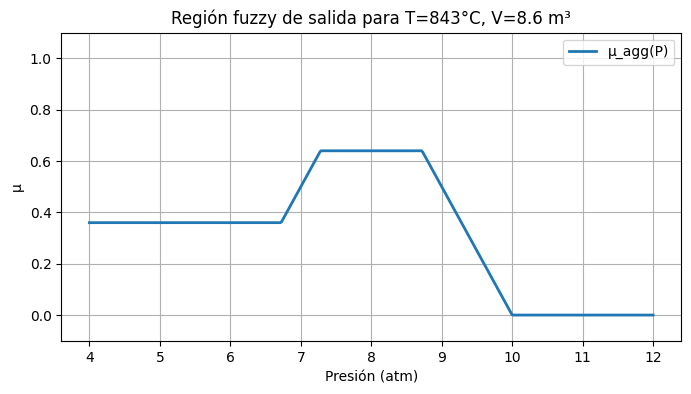

In [19]:
#Caso D
analizar_caso_punto2(843, 8.6)
graficar_salida_caso(843, 8.6)

CASO: T = 1122°C, V = 5.2 m³

Conjuntos activos para Temperatura (T):
  TA (Alta ): μ = 1.0000

Conjuntos activos para Volumen (V):
  VP (Pequeño ): μ = 0.7200
  VM (Medio   ): μ = 0.2800

Reglas activadas (α > 0):
  R3: IF T es TA AND V es VP THEN P es PM | α = 0.7200
  R6: IF T es TA AND V es VM THEN P es PA | α = 0.2800


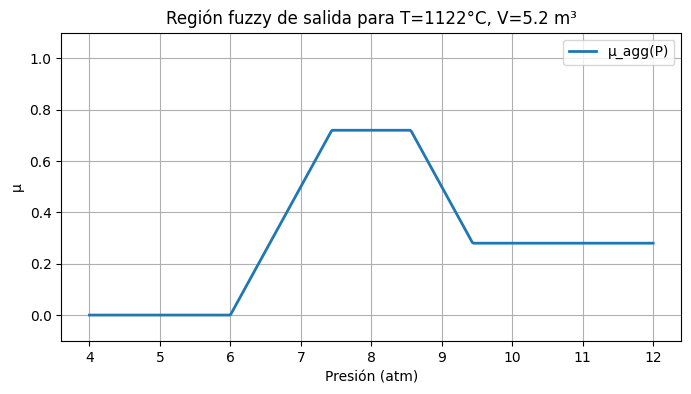

In [20]:
#Caso E
analizar_caso_punto2(1122, 5.2)
graficar_salida_caso(1122, 5.2)

## Punto 3:
Determine e imprima para cada uno de los anteriores valores la región fuzzy resultante de la agregación de todas las reglas activas.
 - Imprima todos los gráficos en la misma hoja.  
    - Utilice 500 puntos de discretización para todos los universos de discurso.  
    - Utilice el operador de composición tipo Max–Min.  
    - Utilice como operador de implicación Mamdani.  
    - Utilice como operador de agregación el Máximo.  
    - Utilice el operador **Mínimo** para el conectivo Y.


#### Desarrollo

A partir de las reglas activas identificadas en el punto anterior, se construye la región fuzzy resultante mediante el proceso de **composición Max–Min**, siguiendo estrictamente las especificaciones:

- Operador Y: mínimo.  
- Implicación Mamdani: recorte por *minimum*.  
- Agregación: operador máximo.  
- Discretización: 500 puntos para el universo de la presión.

##### Para cada caso (a–e)

1. Se calcula la contribución recortada de cada regla activa.
2. Se aplica el operador máximo entre todas las contribuciones.
3. Se obtiene la región fuzzy agregada  

   $$
   \mu_{\mathrm{agg}}(P)
   $$

   que describe la salida del sistema.

Finalmente, se grafican las cinco regiones agregadas en la misma hoja, permitiendo comparar visualmente cómo cambia la presión estimada en función de cada combinación de temperatura y volumen.

Estos gráficos representan la inferencia difusa completa antes de aplicar cualquier método de defuzzificación.


Puntos de discretización en universo_pres: 500
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.3500
  R8: IF T es TM AND V es VG THEN P es PA | α = 0.4000
  R4: IF T es TB AND V es VM THEN P es PB | α = 0.7600
  R5: IF T es TM AND V es VM THEN P es PM | α = 0.2000
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.2400
  R8: IF T es TM AND V es VG THEN P es PA | α = 0.2000
  R2: IF T es TM AND V es VP THEN P es PB | α = 0.2800
  R3: IF T es TA AND V es VP THEN P es PM | α = 0.2800
  R5: IF T es TM AND V es VM THEN P es PM | α = 0.5000
  R6: IF T es TA AND V es VM THEN P es PA | α = 0.5000
  R4: IF T es TB AND V es VM THEN P es PB | α = 0.3600
  R7: IF T es TB AND V es VG THEN P es PM | α = 0.6400
  R3: IF T es TA AND V es VP THEN P es PM | α = 0.7200
  R6: IF T es TA AND V es VM THEN P es PA | α = 0.2800


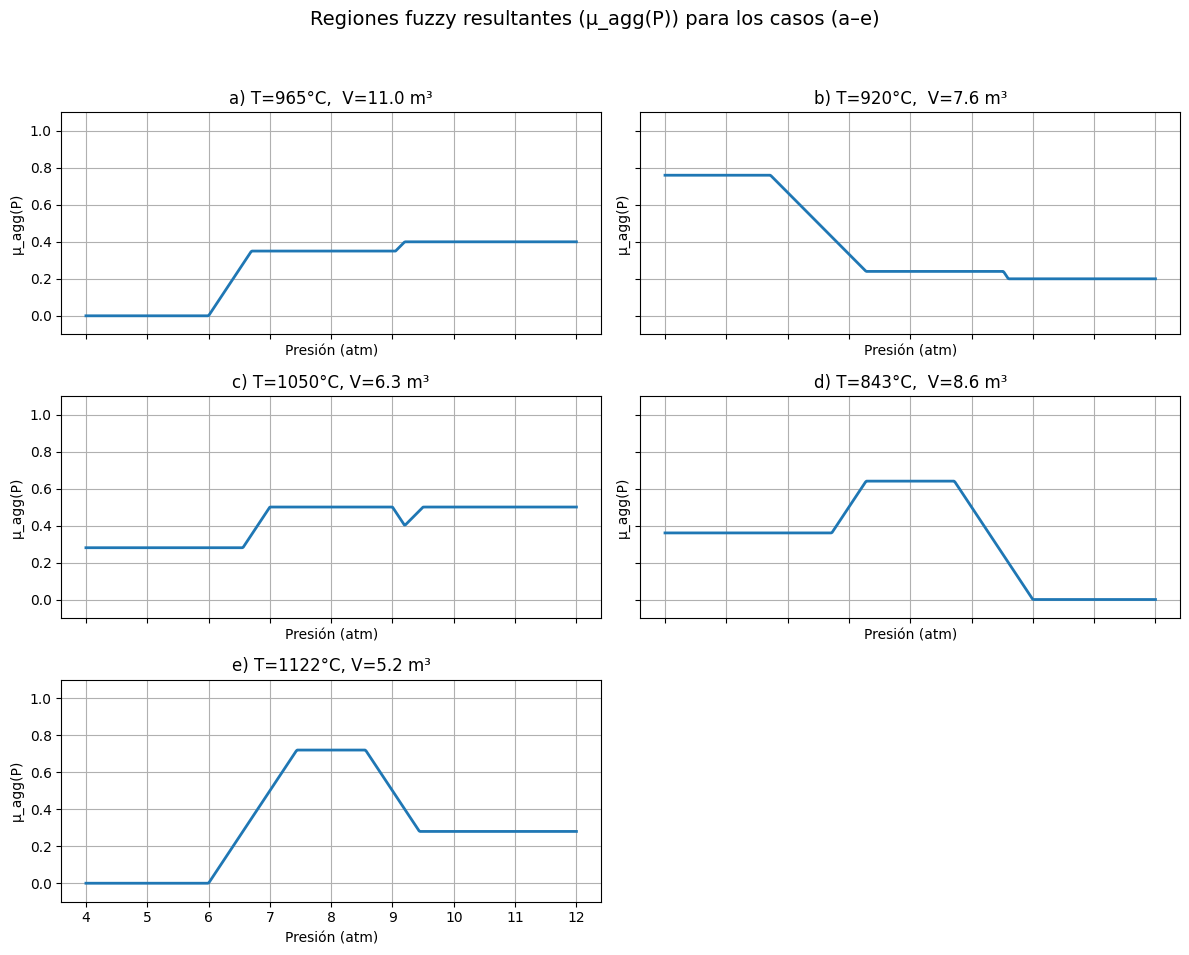

In [21]:
#Región fuzzy agregada
def obtener_region_agregada(T_val, V_val):
    # Fuzzificación de T y V
    mu_T = fuzzificar_variable(T_val, conjuntos_T)
    mu_V = fuzzificar_variable(V_val, conjuntos_V)

    # Activación de reglas (α = min(μ_T, μ_V))
    activaciones = activar_reglas(mu_T, mu_V, reglas)

    # Construcción de la región fuzzy resultante (agregación Max de recortes Mamdani)
    mu_agg, contribuciones = construir_salida_fuzzy(activaciones, conjuntos_P, universo_pres)

    return mu_agg, activaciones

# Casos
casos = [
    ("a) T=965°C,  V=11.0 m³",   965,  11.0),
    ("b) T=920°C,  V=7.6 m³",    920,   7.6),
    ("c) T=1050°C, V=6.3 m³",   1050,   6.3),
    ("d) T=843°C,  V=8.6 m³",    843,   8.6),
    ("e) T=1122°C, V=5.2 m³",   1122,   5.2),
]

def graficar_regiones_agregadas_todos_los_casos():
    print("Puntos de discretización en universo_pres:", len(universo_pres))
    fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True, sharey=True)
    axs = axs.ravel()
    ymax = 1.1

    for i, (titulo, T_val, V_val) in enumerate(casos):
        mu_agg, activaciones = obtener_region_agregada(T_val, V_val)

        ax = axs[i]
        ax.plot(universo_pres, mu_agg, linewidth=2)
        ax.set_title(titulo)
        ax.set_xlabel("Presión (atm)")
        ax.set_ylabel("μ_agg(P)")
        ax.set_ylim(-0.1, ymax)
        ax.grid(True)
        hay_activas = False
        for nombre_regla, info in activaciones.items():
            if info['alpha'] > 0:
                hay_activas = True
                print(f"  {nombre_regla}: IF T es {info['etq_T']} AND V es {info['etq_V']} "
                      f"THEN P es {info['etq_P']} | α = {info['alpha']:.4f}")
        if not hay_activas:
            print("  (ninguna)")

    axs[-1].axis('off')

    plt.suptitle("Regiones fuzzy resultantes (μ_agg(P)) para los casos (a–e)", fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

graficar_regiones_agregadas_todos_los_casos()


## Punto 4:
Basado en los resultados del ejercicio 3 determine la defuzzificación usando el Centro de Area.


#### Desarrollo

Con base en las regiones fuzzy agregadas obtenidas en el punto 3, se calcula la defuzzificación usando el método del Centro de Área (CDA), también conocido como *centroide*:

$$
P_{\mathrm{CDA}} = 
\frac{\sum_{i} \, p_i \, \mu_{\mathrm{agg}}(p_i)}
     {\sum_{i} \mu_{\mathrm{agg}}(p_i)}
$$

Este método encuentra el “centro de gravedad” de la región fuzzy de salida y proporciona un valor *crisp* suave, estable y representativo de toda la distribución.

##### Para cada caso (a–e)

1. Se toma la curva:

   $$ 
   \mu_{\mathrm{agg}}(P)
   $$

2. Se calcula el centroide sobre los 500 puntos del universo.  
3. Se imprime una tabla con los valores **CDA** para cada combinación \((T, V)\).

Esta etapa produce la primera forma de salida *crisp* del sistema, basada en el promedio ponderado de toda la región difusa.


DEFUZZIFICACIÓN POR CENTRO DE ÁREA (CDA)

Caso    T(°C)    V(m³)   CDA P(atm)
----------------------------------------
a       965.0    11.00       9.2698


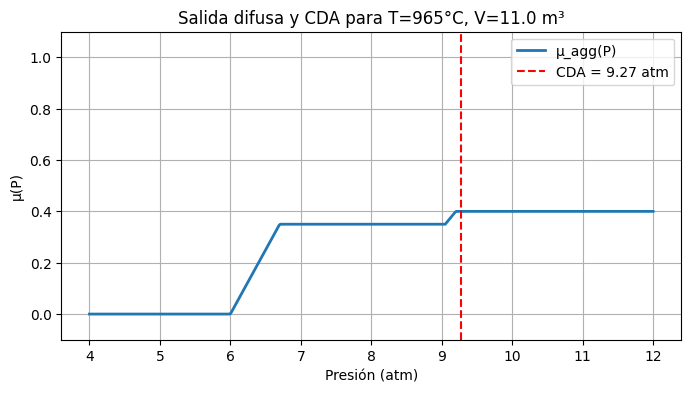

b       920.0     7.60       6.7823


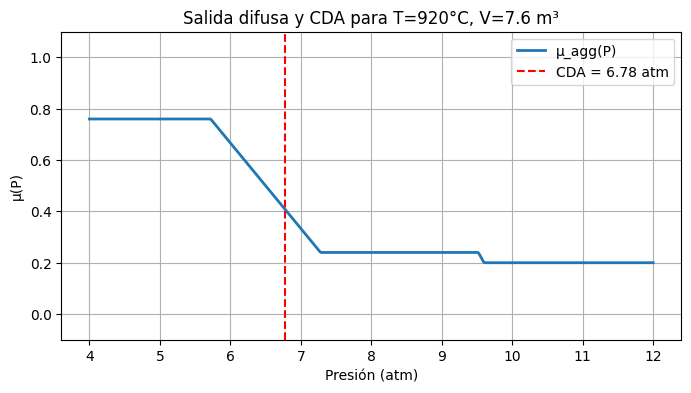

c      1050.0     6.30       8.4661


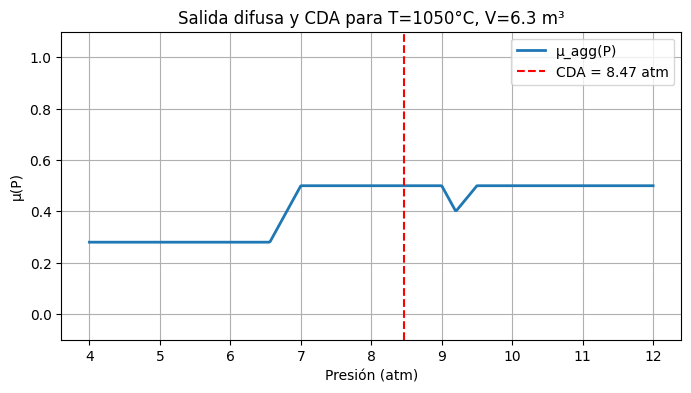

d       843.0     8.60       7.0747


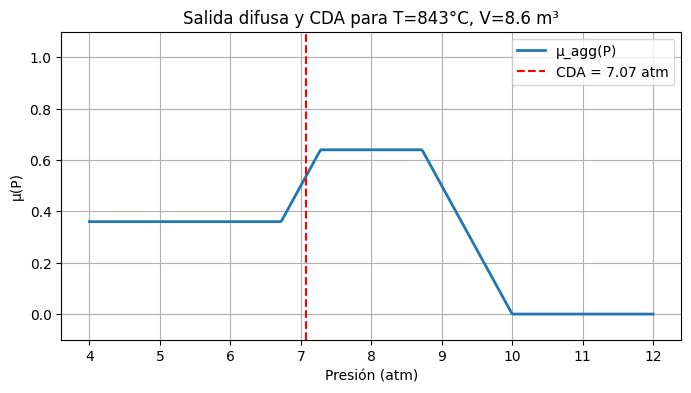

e      1122.0     5.20       8.7372


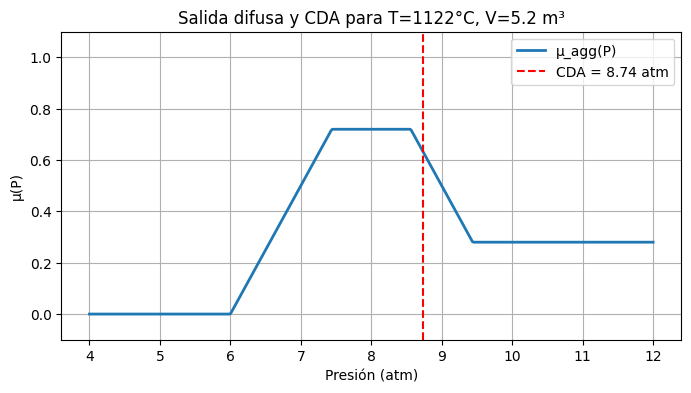

In [ ]:
def defuzzificar_centroide(universo, mu):

    num = np.sum(universo * mu)
    den = np.sum(mu)
    if den == 0:
        return np.nan 
    return num / den

def graficar_caso_con_cda(T_val, V_val):
    mu_agg, _ = obtener_region_agregada(T_val, V_val)
    cda = defuzzificar_centroide(universo_pres, mu_agg)

    plt.figure(figsize=(8,4))
    plt.plot(universo_pres, mu_agg, label="μ_agg(P)", linewidth=2)
    plt.axvline(cda, color="red", linestyle="--", label=f"CDA = {cda:.2f} atm")
    plt.title(f"Salida difusa y CDA para T={T_val}°C, V={V_val} m³")
    plt.xlabel("Presión (atm)")
    plt.ylabel("μ(P)")
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

    return cda

casos = [
    ("a", 965,  11.0),
    ("b", 920,   7.6),
    ("c", 1050,  6.3),
    ("d", 843,   8.6),
    ("e", 1122,  5.2),
]

print("DEFUZZIFICACIÓN POR CENTRO DE ÁREA (CDA)\n")
print(f"{'Caso':<4} {'T(°C)':>8} {'V(m³)':>8} {'CDA P(atm)':>12}")
print("-"*40)

for nombre, T_val, V_val in casos:
    # 1) Región fuzzy resultante
    mu_agg, _ = obtener_region_agregada(T_val, V_val)

    # 2) Centro de Área
    cda = defuzzificar_centroide(universo_pres, mu_agg)

    print(f"{nombre:<4} {T_val:8.1f} {V_val:8.2f} {cda:12.4f}")
    graficar_caso_con_cda(T_val, V_val)


## Punto 5:
Basado en los resultados del ejercicio 3 determine la defuzzificación usando la Media de los Máximos

#### Desarrollo

En este punto se realiza la defuzzificación mediante la Media de los Máximos (MoM).  
El método identifica todos los puntos donde la función agregada alcanza su valor máximo:

$$
\mu_{\max} = \max\big( \mu_{\mathrm{agg}}(p_i) \big)
$$

Luego calcula el promedio de todos los valores \(p_i\) donde  
\(\mu_{\mathrm{agg}}(p_i) = \mu_{\max}\):

$$
P_{\mathrm{MoM}} = \mathrm{mean}\{\, p_i : \mu_{\mathrm{agg}}(p_i) = \mu_{\max} \,\}
$$

Este método es útil cuando la salida presenta mesetas o regiones planas en su máximo.

En la práctica

1. El código identifica los índices donde ocurre el máximo.  
2. Extrae los valores correspondientes de presión.  
3. Calcula su promedio.  
4. Presenta los valores MoM para los cinco casos.

MoM es un método menos global que CDA, pero más estable que elegir un único punto.


DEFUZZIFICACIÓN POR MEDIA DE LOS MÁXIMOS (MoM)

Caso    T(°C)    V(m³)   MoM P(atm)
----------------------------------------
a       965.0    11.00      10.6052


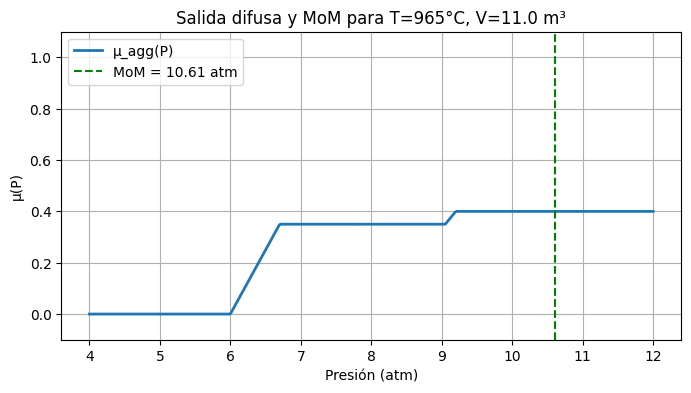

b       920.0     7.60       4.8577


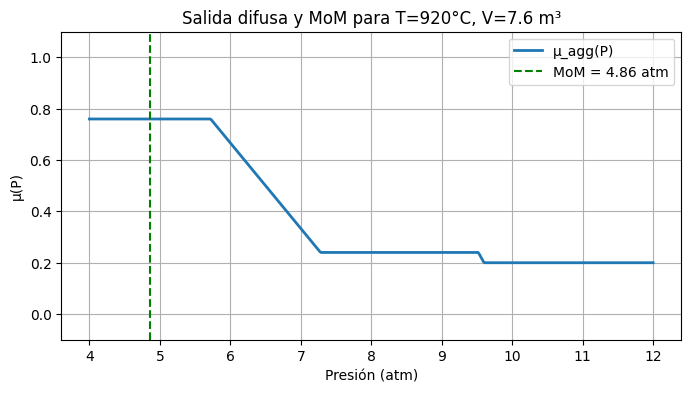

c      1050.0     6.30       9.5363


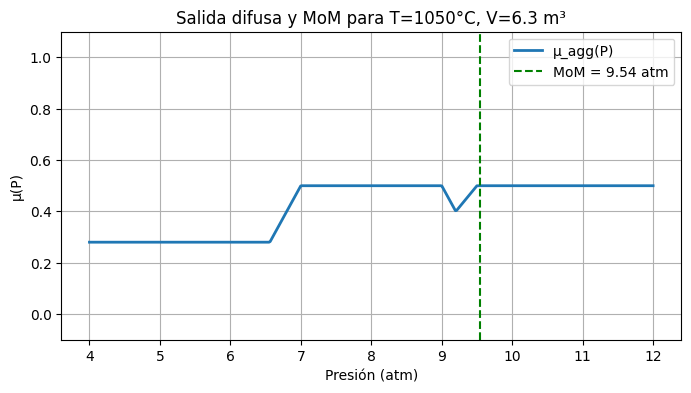

d       843.0     8.60       8.0000


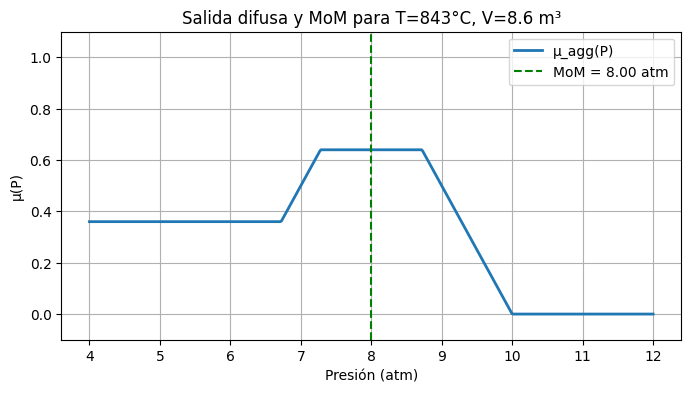

e      1122.0     5.20       8.0000


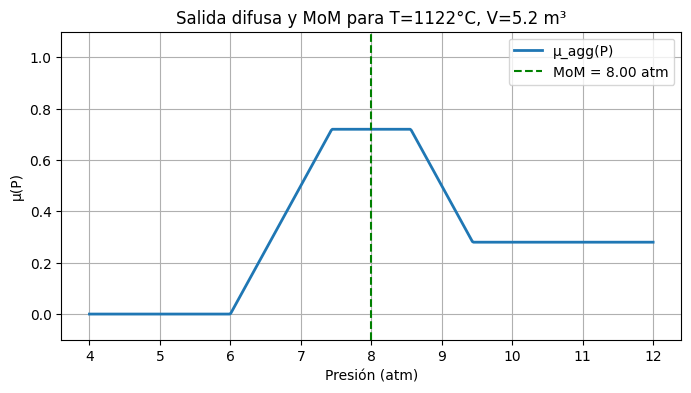

In [26]:
def defuzzificar_media_maximos(universo, mu, tol=1e-12):

    if mu.size == 0:
        return np.nan

    mu_max = np.max(mu)
    if mu_max == 0:
        return np.nan  

    # índices donde μ(x) está en el máximo
    indices_max = np.where(np.abs(mu - mu_max) < tol)[0]
    x_max = universo[indices_max]

    if x_max.size == 0:
        return np.nan

    return np.mean(x_max)

def graficar_caso_con_mom(T_val, V_val):
    mu_agg, _ = obtener_region_agregada(T_val, V_val)
    mom = defuzzificar_media_maximos(universo_pres, mu_agg)

    plt.figure(figsize=(8,4))
    plt.plot(universo_pres, mu_agg, label="μ_agg(P)", linewidth=2)
    plt.axvline(mom, color="green", linestyle="--", label=f"MoM = {mom:.2f} atm")
    plt.title(f"Salida difusa y MoM para T={T_val}°C, V={V_val} m³")
    plt.xlabel("Presión (atm)")
    plt.ylabel("μ(P)")
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

    return mom

casos = [
    ("a", 965,  11.0),
    ("b", 920,   7.6),
    ("c", 1050,  6.3),
    ("d", 843,   8.6),
    ("e", 1122,  5.2),
]

print("DEFUZZIFICACIÓN POR MEDIA DE LOS MÁXIMOS (MoM)\n")
print(f"{'Caso':<4} {'T(°C)':>8} {'V(m³)':>8} {'MoM P(atm)':>12}")
print("-"*40)

for nombre, T_val, V_val in casos:
    # 1) Región fuzzy agregada
    mu_agg, _ = obtener_region_agregada(T_val, V_val)

    # 2) Media de los Máximos
    mom = defuzzificar_media_maximos(universo_pres, mu_agg)

    print(f"{nombre:<4} {T_val:8.1f} {V_val:8.2f} {mom:12.4f}")
    graficar_caso_con_mom(T_val, V_val)


## Punto 6:
Basado en los resultados del ejercicio 3 determine la defuzzificación usando el Primer Maximo


#### Desarrollo

Finalmente, se emplea el método del Primer Máximo (FPM), que selecciona el primer valor de presión donde la región posterior alcanza su máximo:

$$
P_{\mathrm{FPM}} = \min \{\, p_i : \mu_{\mathrm{agg}}(p_i) = \mu_{\max} \,\}
$$

A diferencia de CDA y MoM, este método produce un valor *crisp* rápido y conservador, ya que toma el primer punto donde la salida es máxima, ignorando el resto de la curva.

1. Se ubican todos los puntos donde \( \mu_{\mathrm{agg}}(p) \) alcanza \( \mu_{\max} \).  
2. Se selecciona el primero (el más a la izquierda).  
3. Se imprime la tabla con los valores FPM para los cinco casos.


DEFUZZIFICACIÓN POR PRIMER MÁXIMO (FPM)

Caso    T(°C)    V(m³)   FPM P(atm)
----------------------------------------
a       965.0    11.00       9.2104


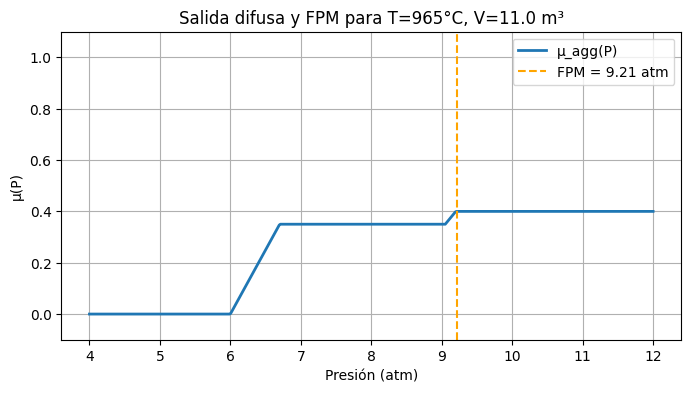

b       920.0     7.60       4.0000


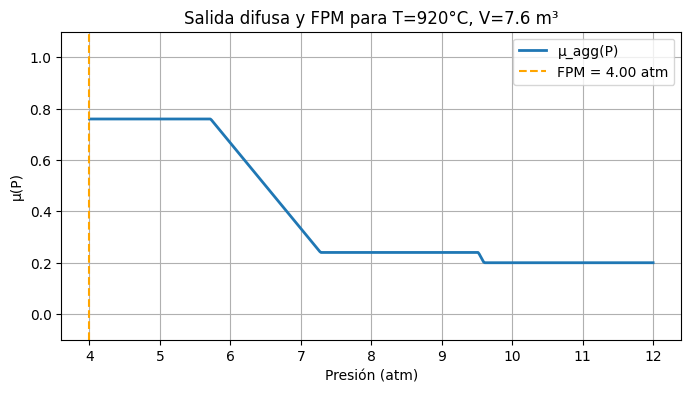

c      1050.0     6.30       7.0140


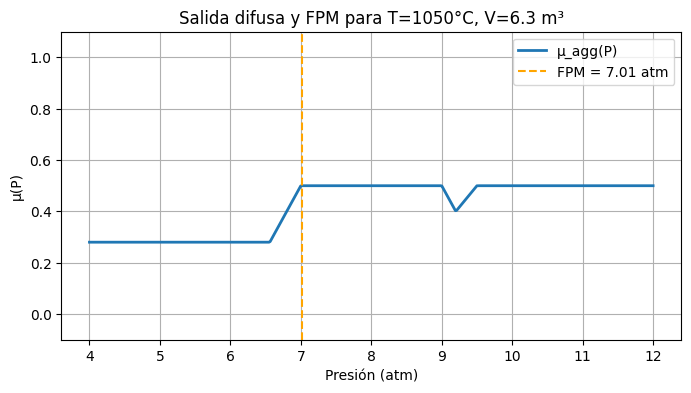

d       843.0     8.60       7.2866


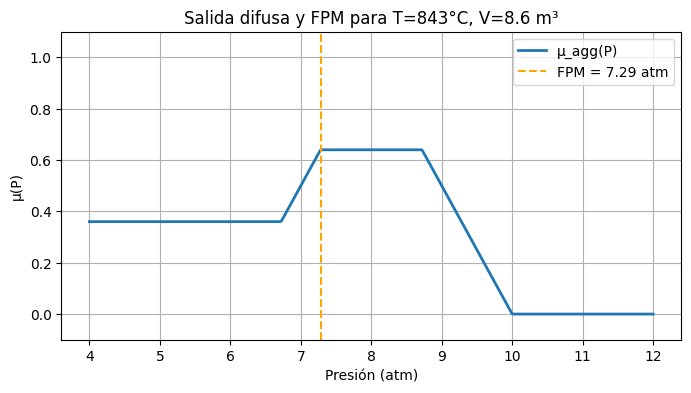

e      1122.0     5.20       7.4469


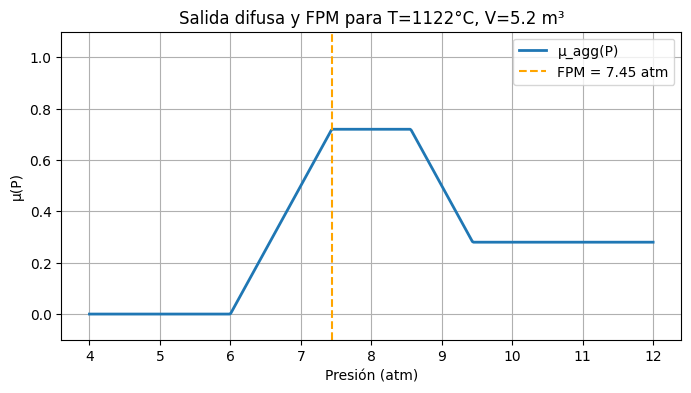

In [27]:
def defuzzificar_primer_maximo(universo, mu, tol=1e-12):
    if mu.size == 0:
        return np.nan

    mu_max = np.max(mu)
    if mu_max == 0:
        return np.nan

    # índices donde μ(x) alcanza el máximo (con tolerancia)
    indices_max = np.where(np.abs(mu - mu_max) < tol)[0]
    if indices_max.size == 0:
        return np.nan

    # primer máximo
    idx_primero = indices_max[0]
    return universo[idx_primero]

def graficar_caso_con_fpm(T_val, V_val):
    mu_agg, _ = obtener_region_agregada(T_val, V_val)
    fpm = defuzzificar_primer_maximo(universo_pres, mu_agg)

    plt.figure(figsize=(8,4))
    plt.plot(universo_pres, mu_agg, label="μ_agg(P)", linewidth=2)
    plt.axvline(fpm, color="orange", linestyle="--", label=f"FPM = {fpm:.2f} atm")
    plt.title(f"Salida difusa y FPM para T={T_val}°C, V={V_val} m³")
    plt.xlabel("Presión (atm)")
    plt.ylabel("μ(P)")
    plt.ylim(-0.1, 1.1)
    plt.grid(True)
    plt.legend()
    plt.show()

    return fpm

casos = [
    ("a", 965,  11.0),
    ("b", 920,   7.6),
    ("c", 1050,  6.3),
    ("d", 843,   8.6),
    ("e", 1122,  5.2),
]

print("DEFUZZIFICACIÓN POR PRIMER MÁXIMO (FPM)\n")
print(f"{'Caso':<4} {'T(°C)':>8} {'V(m³)':>8} {'FPM P(atm)':>12}")
print("-"*40)

for nombre, T_val, V_val in casos:
    # 1) Región fuzzy agregada del punto 3
    mu_agg, _ = obtener_region_agregada(T_val, V_val)

    # 2) Primer Máximo
    fpm = defuzzificar_primer_maximo(universo_pres, mu_agg)

    print(f"{nombre:<4} {T_val:8.1f} {V_val:8.2f} {fpm:12.4f}")
    graficar_caso_con_fpm(T_val, V_val)
